### 1. Load your dataset.

In [1]:
import pandas as pd
import numpy as np
data= pd.read_csv('CC_GENERAL.csv')
data.pop('CUST_ID')# we remove Ids 
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
#We have missing values.
#Let's check for outliers also and treat them all.

def nb_of_outliers(data):
#We calculate the first and third quartiles and deduce the interquartile range.
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR= Q3 - Q1
#We calculate the values laying outside lower and upper bounds.
    maximum= Q3 +(1.5*IQR)
    minimum= Q1 - (1.5*IQR)
#Outliers are the sum of all values laying outside the lower and upper bounds
    outliers= np.sum((data<minimum)|(data>maximum))
    return outliers
nb_of_outliers(data)

#We will now replace the outliers with NaN values and drop them all.
for column in data.columns:
    data.loc['outliers']=np.nan 
data= data.dropna(axis=0)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [4]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

### 3. Plot the clusters.

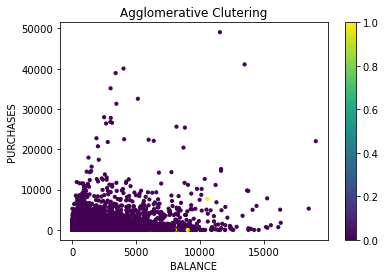

In [25]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)#Applying agglomerative algorithm with the default number of clusters.using euclidean distance as a metric.

#Creating agglomerative labels
agglomerative= pd.DataFrame(clust_labels)

# We will consider the features Balance and Purchaches 
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data['BALANCE'] , data['PURCHASES'] , c= agglomerative[0], s=10)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

### 4. Plot the dendrogram

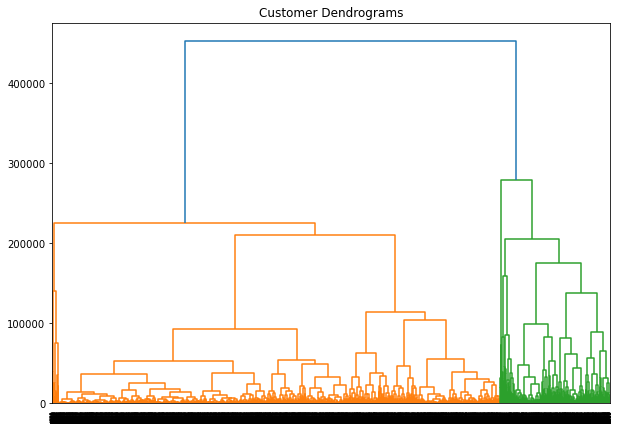

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="ward"))

### Use k-means clustering.

In [7]:
from sklearn.cluster import KMeans#Importing our clustering algorithm: KMeans

### 5. Try different k values and select the best one. 

In [26]:
#After trying different k values,we decide to chose 2.

kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 2 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

### 6. Plot the clusters. 

In [ ]:
labels=pd.DataFrame(kmeans.labels_)#Creating agglomerative labels

data['label']=kmeans.labels_# Adding 'label' to the dataframe.
kmeans.predict(data)

kmeans.cluster_centers_#the coordinates of cluster centers.

plt.scatter(data["BALANCE"][data.label == 0],          
            data["PURCHASES"][data.label == 0],s=10,c='magenta',label='Cluster1')
plt.scatter(data["BALANCE"][data.label == 1],
           data["PURCHASES"][data.label == 1],s=10,c='yellow',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [ ]:
labels.value_counts()

### 7. Compare the two results. 

#### With the same same number of cluster value , k-mean algorithm shows more clusters than Agglomerative algorithm.

### Let's try another validation metric.

In [24]:
#We will try the homogeneity metric of a cluster
# The 
from sklearn.metrics.cluster import homogeneity_score#Importing the metric

labels_pred=kmeans.predict(data)# Instantiating our predicted labels
homogeneity_score(data['label'],labels_pred)

0.6098907945943014